In [1]:
from pandas import DataFrame, read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from pprint import pprint
from matplotlib import pyplot as plt
from dataprocessing import *
import numpy as np

# %matplotlib notebook
%matplotlib inline

In [2]:
project = 'gmsc'

In [3]:
fulltrain=read_csv('./cs-training.csv',index_col=0)
test=read_csv('./cs-test.csv',index_col=0)

In [4]:
obj_field = 'SeriousDlqin2yrs'

In [5]:
shape = fulltrain.shape
print(shape)

(150000, 11)


In [6]:
# process_fillna(fulltrain, 'MonthlyIncome', 0)
# monthly_debt(fulltrain, 0)

In [7]:
types = fulltrain.dtypes
print(types)

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


In [8]:
set_option('display.width', 100)
set_option('precision', 3)
description = fulltrain.describe()
display(description)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000,150000.000,150000.000,150000.000,150000.000,1.203e+05,150000.000,150000.000,150000.000,150000.000,146076.000
mean,0.067,6.048,52.295,0.421,353.005,6.670e+03,8.453,0.266,1.018,0.240,0.757
std,0.250,249.755,14.772,4.193,2037.819,1.438e+04,5.146,4.169,1.130,4.155,1.115
min,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.030,41.000,0.000,0.175,3.400e+03,5.000,0.000,0.000,0.000,0.000
50%,0.000,0.154,52.000,0.000,0.367,5.400e+03,8.000,0.000,1.000,0.000,0.000
75%,0.000,0.559,63.000,0.000,0.868,8.249e+03,11.000,0.000,2.000,0.000,1.000
max,1.000,50708.000,109.000,98.000,329664.000,3.009e+06,58.000,98.000,54.000,98.000,20.000


In [9]:
class_counts = fulltrain.groupby(obj_field).size()
display(class_counts)

SeriousDlqin2yrs
0    139974
1     10026
dtype: int64

# Correlations between features

In [10]:
correlations = fulltrain.corr(method='pearson')
display(correlations)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000,-0.002,-0.115,0.126,-0.008,-0.020,-0.030,0.117,-0.007,0.102,0.046
RevolvingUtilizationOfUnsecuredLines,-0.002,1.000,-0.006,-0.001,0.004,0.007,-0.011,-0.001,0.006,-0.001,0.002
age,-0.115,-0.006,1.000,-0.063,0.024,0.038,0.148,-0.061,0.033,-0.057,-0.213
NumberOfTime30-59DaysPastDueNotWorse,0.126,-0.001,-0.063,1.000,-0.007,-0.010,-0.055,0.984,-0.031,0.987,-0.003
DebtRatio,-0.008,0.004,0.024,-0.007,1.000,-0.029,0.050,-0.008,0.120,-0.008,-0.041
MonthlyIncome,-0.020,0.007,0.038,-0.010,-0.029,1.000,0.091,-0.013,0.125,-0.011,0.063
NumberOfOpenCreditLinesAndLoans,-0.030,-0.011,0.148,-0.055,0.050,0.091,1.000,-0.080,0.434,-0.071,0.065
NumberOfTimes90DaysLate,0.117,-0.001,-0.061,0.984,-0.008,-0.013,-0.080,1.000,-0.045,0.993,-0.010
NumberRealEstateLoansOrLines,-0.007,0.006,0.033,-0.031,0.120,0.125,0.434,-0.045,1.000,-0.040,0.125
NumberOfTime60-89DaysPastDueNotWorse,0.102,-0.001,-0.057,0.987,-0.008,-0.011,-0.071,0.993,-0.040,1.000,-0.011


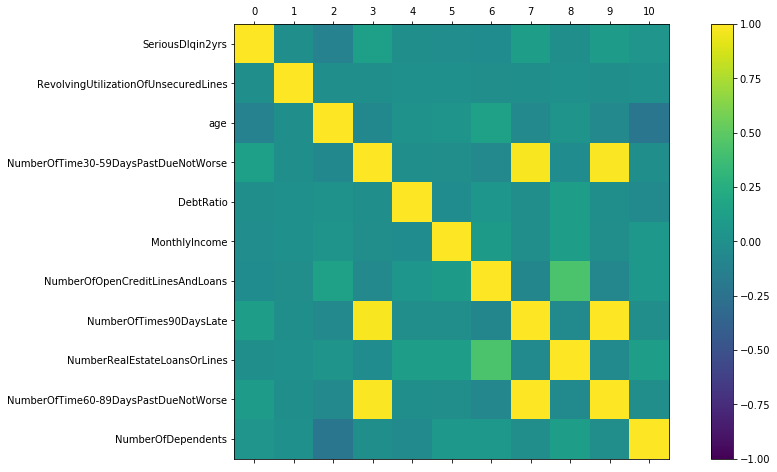

In [11]:
names = fulltrain.columns.values
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1,vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
# ax.set_xticklabels(names)
ax.set_yticks(ticks)
ax.set_yticklabels(names)
plt.show()

# Skewness

In [12]:
skew = fulltrain.skew()
print(skew)

SeriousDlqin2yrs                          3.469
RevolvingUtilizationOfUnsecuredLines     97.632
age                                       0.189
NumberOfTime30-59DaysPastDueNotWorse     22.597
DebtRatio                                95.158
MonthlyIncome                           114.040
NumberOfOpenCreditLinesAndLoans           1.215
NumberOfTimes90DaysLate                  23.087
NumberRealEstateLoansOrLines              3.482
NumberOfTime60-89DaysPastDueNotWorse     23.332
NumberOfDependents                        1.588
dtype: float64


# Histograms and density plots

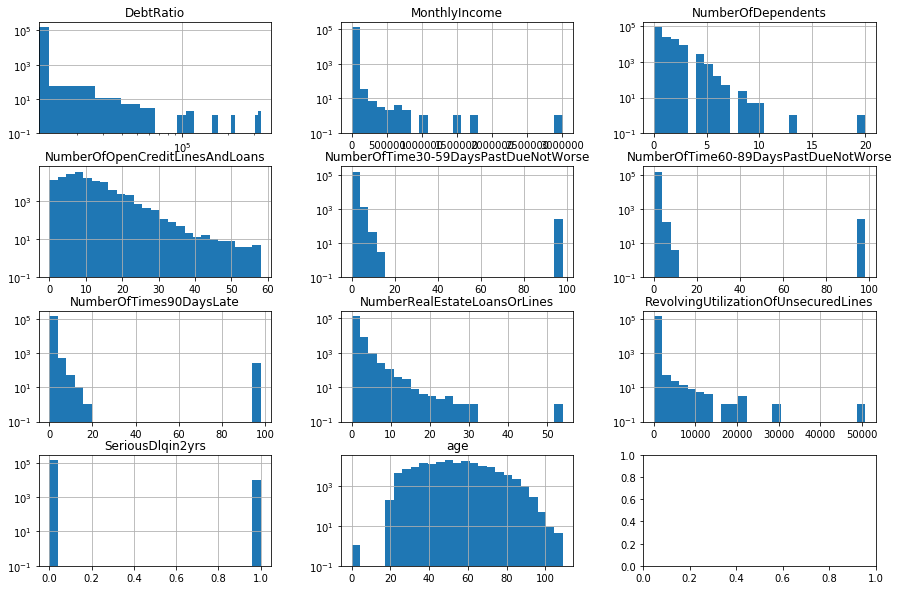

In [13]:
fig, ax = plt.subplots(4, 3, figsize=(15, 10))
ax_flat = [sub for line in ax for sub in line]
fulltrain.hist(ax=ax_flat[0:11], bins=25, log=True, bottom=0.1)
ax[0,0].set_xscale('log')
plt.show()

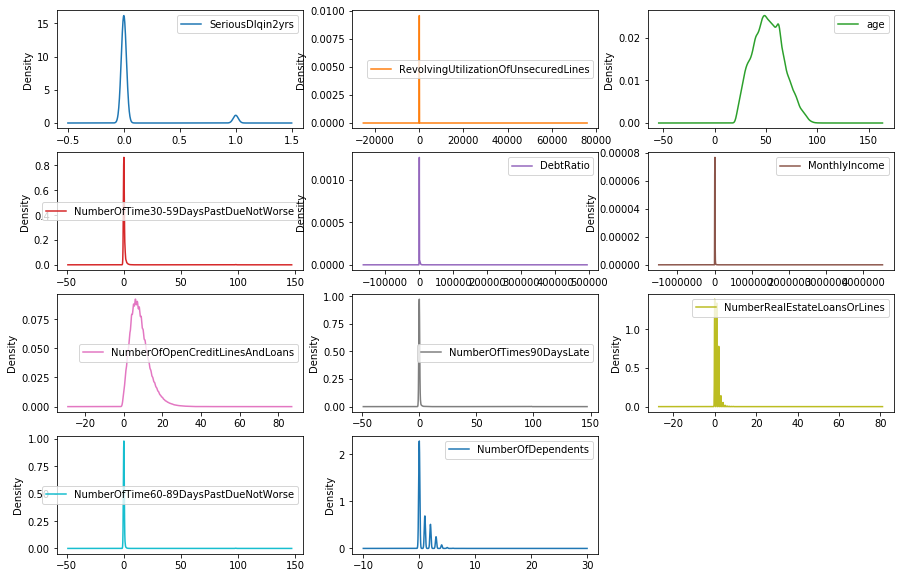

In [14]:
fulltrain.plot(kind='density',subplots=True, layout=(4,3), sharex=False, figsize=(15, 10))
plt.show()

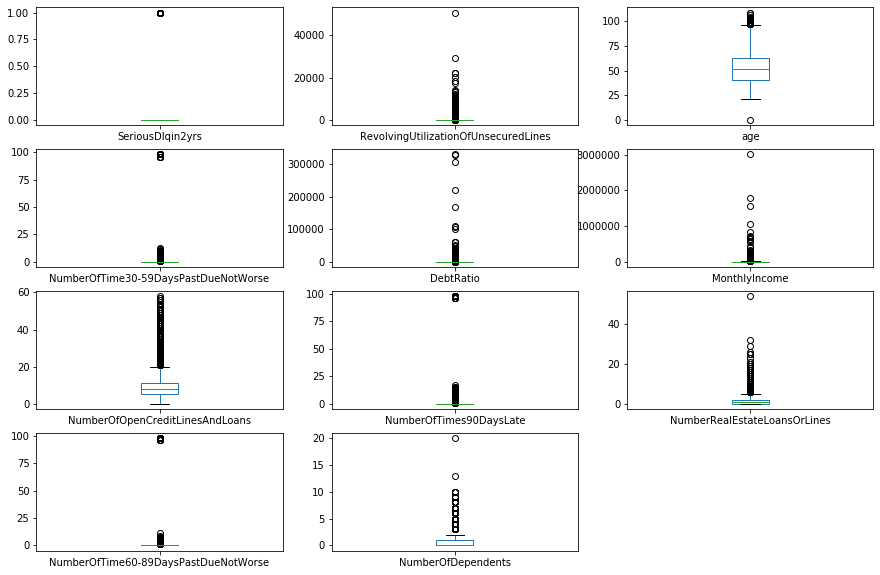

In [15]:
fulltrain.plot(kind='box',subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(15, 10))
plt.show()

# Scatter plot

In [16]:
scatter_matrix(fulltrain)
plt.show()

KeyboardInterrupt: 

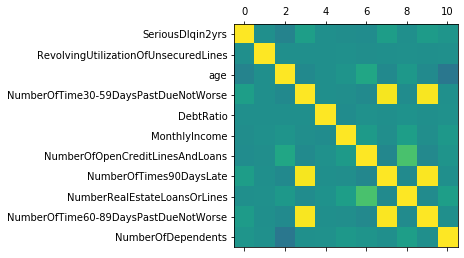

In [31]:
df = fulltrain.loc[~fulltrain['MonthlyIncome'].isna()]
correlations = df.corr(method='pearson')
#display(correlations)
plt.matshow(correlations, vmin=-1,vmax=1)
plt.yticks(range(11), names)
#plt.xticks(range(11), names)
plt.show()

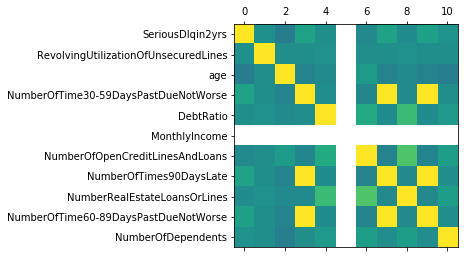

In [32]:
df = fulltrain.loc[fulltrain['MonthlyIncome'].isna()]
correlations = df.corr(method='pearson')
# display(correlations)
plt.matshow(correlations, vmin=-1,vmax=1)
plt.yticks(range(11), names)
#plt.xticks(range(11), names)
plt.show()

Correlations with Debt Ratio are different when the monthly income is undefined.

# "number of times late" columns

In [33]:
# from sklearn.decomposition import PCA
df = fulltrain[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']]
X = (df.loc[(df['NumberOfTime30-59DaysPastDueNotWorse']<90) &
           (df['NumberOfTime60-89DaysPastDueNotWorse']<90) &
           (df['NumberOfTimes90DaysLate']<90)]).values

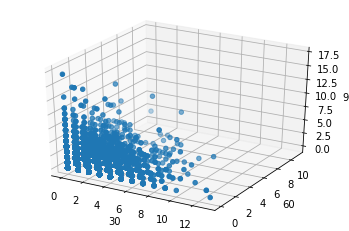

In [35]:
%matplotlib inline
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
xs = X[:,0]
ys = X[:,1]
zs = X[:,2]
ax.scatter(xs, ys, zs)
ax.set_xlabel('30')
ax.set_ylabel('60')
ax.set_zlabel('90')
plt.show()